In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

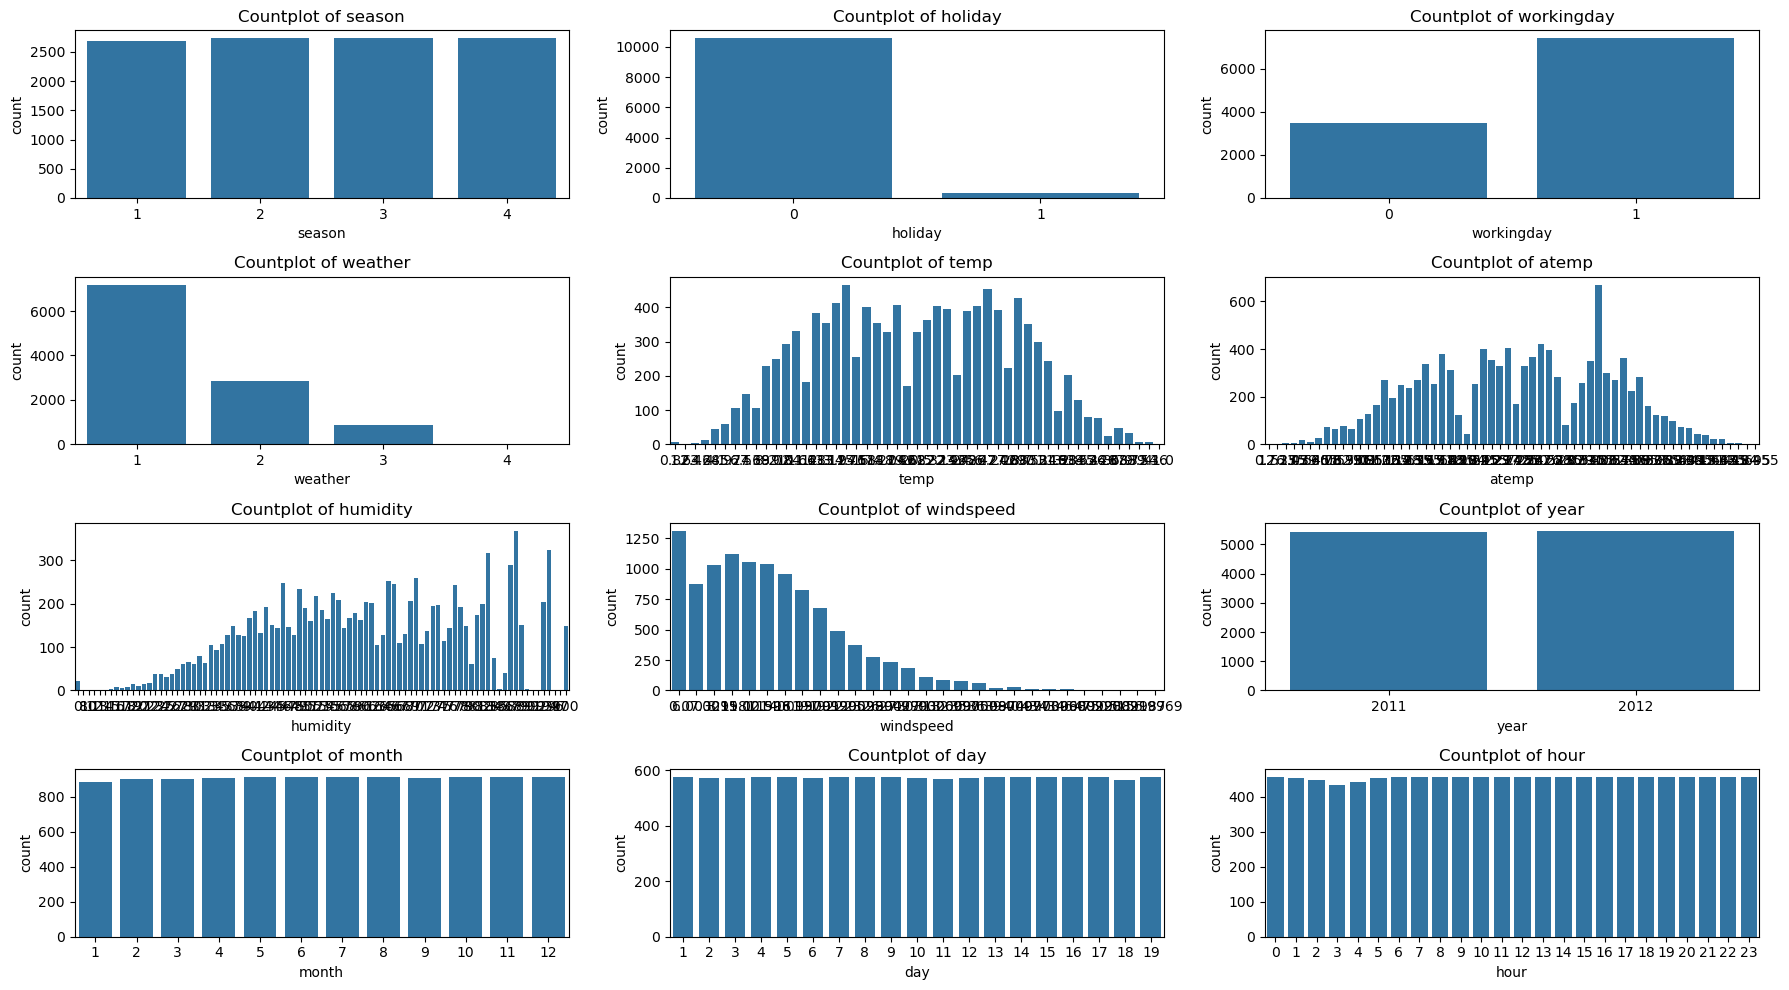

In [12]:
import seaborn as sns

fig, axs = plt.subplots(4, 3, figsize=(18, 10))
cols = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour'] # 다음변수는 관련 없어 보이므로 제외 'casual','registered','minute','second'
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
features = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19945.370053754057
RMSE: 141.22807813517133


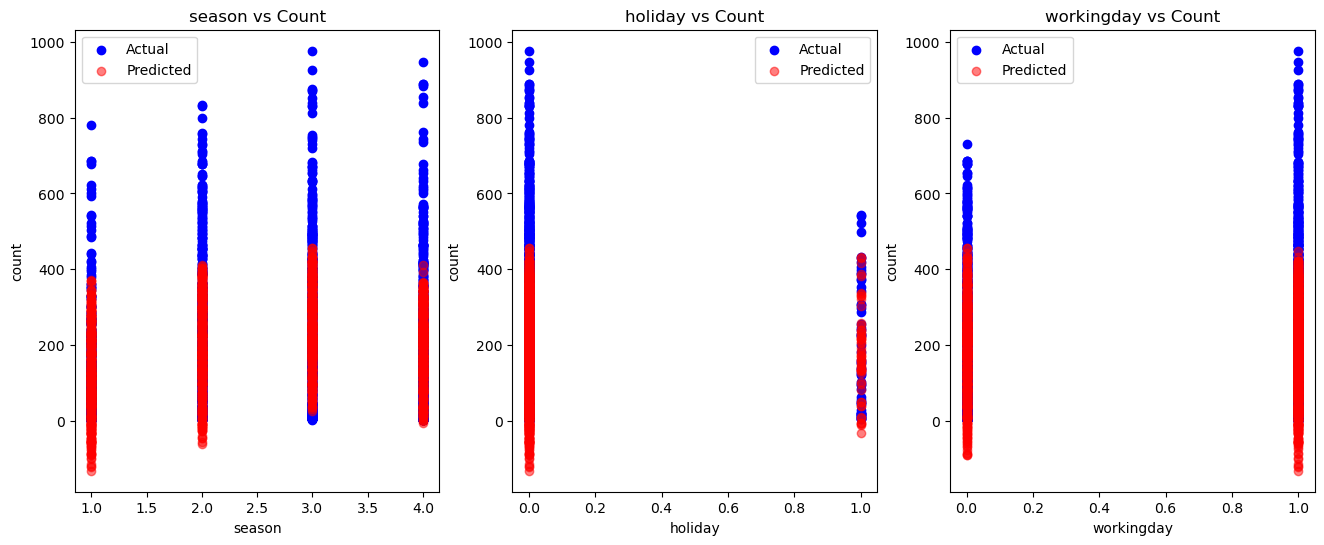

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# season vs count 시각화
axs[0].scatter(X_test['season'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['season'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('season')
axs[0].set_ylabel('count')
axs[0].set_title('season vs Count')
axs[0].legend()

# holiday vs count 시각화
axs[1].scatter(X_test['holiday'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['holiday'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('holiday')
axs[1].set_ylabel('count')
axs[1].set_title('holiday vs Count')
axs[1].legend()

# workingday vs count 시각화
axs[2].scatter(X_test['workingday'], y_test, color='blue', label='Actual')
axs[2].scatter(X_test['workingday'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[2].set_xlabel('workingday')
axs[2].set_ylabel('count')
axs[2].set_title('workingday vs Count')
axs[2].legend()

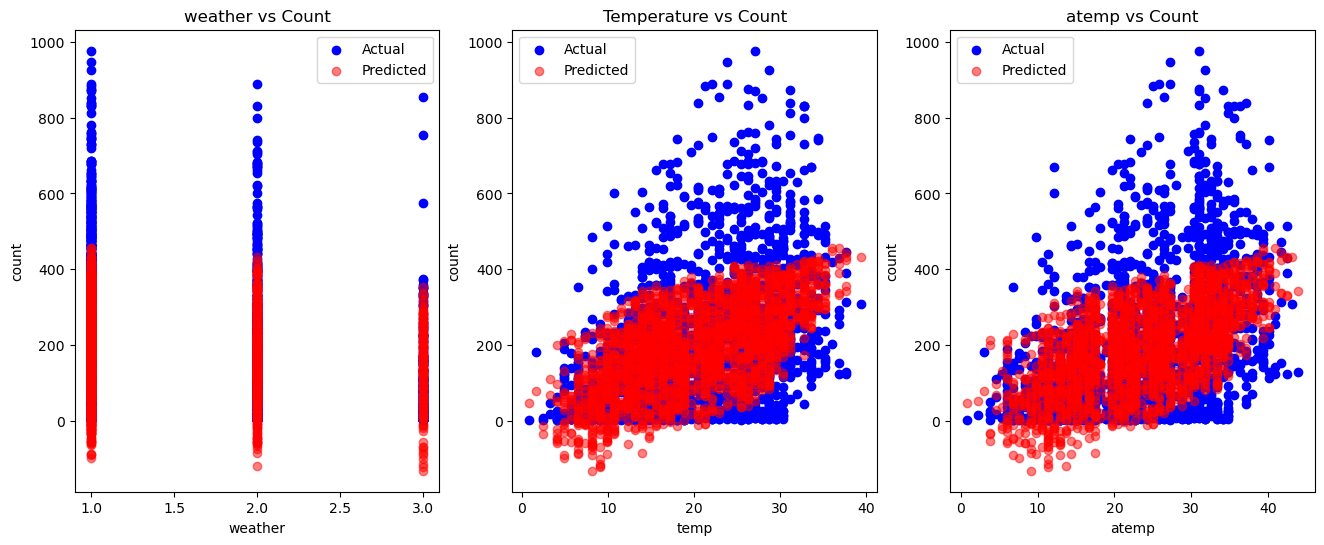

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# season vs count 시각화
axs[0].scatter(X_test['weather'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['weather'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('weather')
axs[0].set_ylabel('count')
axs[0].set_title('weather vs Count')
axs[0].legend()

# temp vs count 시각화
axs[1].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('temp')
axs[1].set_ylabel('count')
axs[1].set_title('Temperature vs Count')
axs[1].legend()

# atemp vs count 시각화
axs[2].scatter(X_test['atemp'], y_test, color='blue', label='Actual')
axs[2].scatter(X_test['atemp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[2].set_xlabel('atemp')
axs[2].set_ylabel('count')
axs[2].set_title('atemp vs Count')
axs[2].legend()

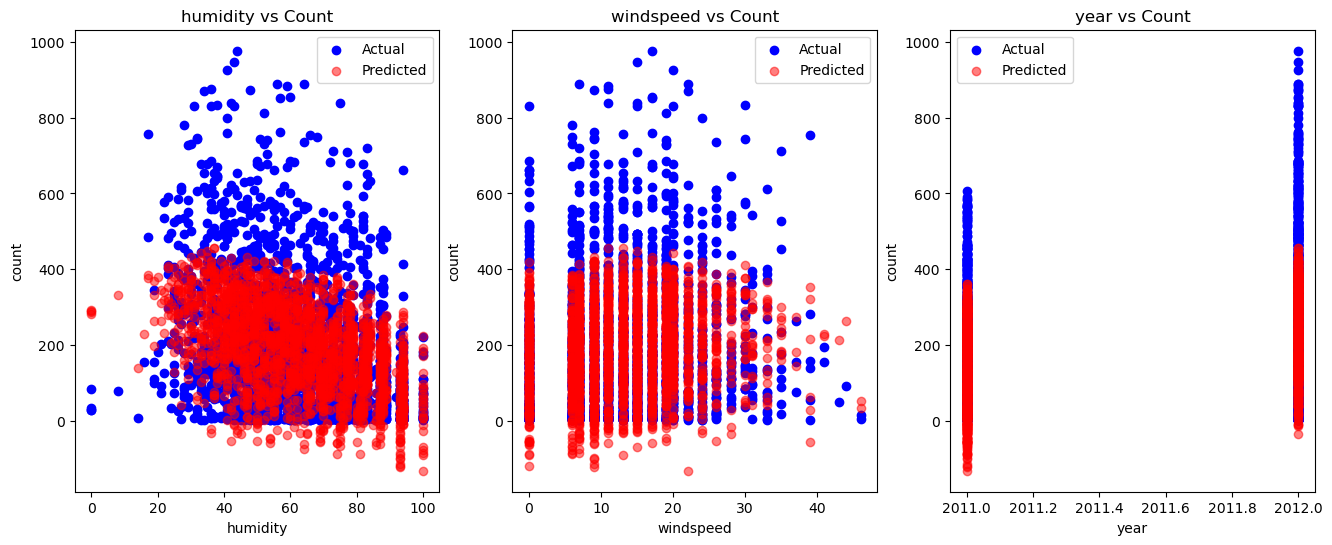

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# humidity vs count 시각화
axs[0].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('humidity')
axs[0].set_ylabel('count')
axs[0].set_title('humidity vs Count')
axs[0].legend()

# windspeed vs count 시각화
axs[1].scatter(X_test['windspeed'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['windspeed'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('windspeed')
axs[1].set_ylabel('count')
axs[1].set_title('windspeed vs Count')
axs[1].legend()

# year vs count 시각화
axs[2].scatter(X_test['year'], y_test, color='blue', label='Actual')
axs[2].scatter(X_test['year'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[2].set_xlabel('year')
axs[2].set_ylabel('count')
axs[2].set_title('year vs Count')
axs[2].legend()

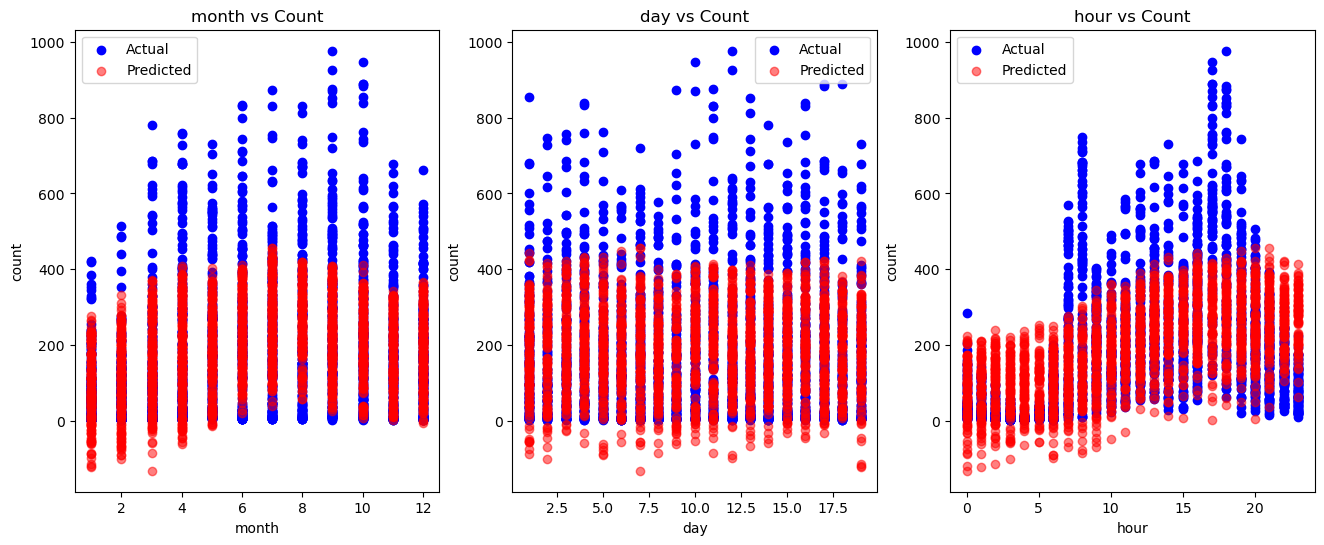

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# month vs count 시각화
axs[0].scatter(X_test['month'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['month'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('month')
axs[0].set_ylabel('count')
axs[0].set_title('month vs Count')
axs[0].legend()

# day vs count 시각화
axs[1].scatter(X_test['day'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['day'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('day')
axs[1].set_ylabel('count')
axs[1].set_title('day vs Count')
axs[1].legend()

# hour vs count 시각화
axs[2].scatter(X_test['hour'], y_test, color='blue', label='Actual')
axs[2].scatter(X_test['hour'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[2].set_xlabel('hour')
axs[2].set_ylabel('count')
axs[2].set_title('hour vs Count')
axs[2].legend()